## Inicialização

In [228]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import math
from qiskit import qasm3
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_qsphere
from qiskit import transpile
from qiskit.visualization import plot_state_city, plot_histogram

#### Um QUBIT é o equivalente de um BIT na computação clássica, mas ao contrário de um BIT, que só pode assumir dois estados, o computador quantico permite multiplos estados (infinitos estados).

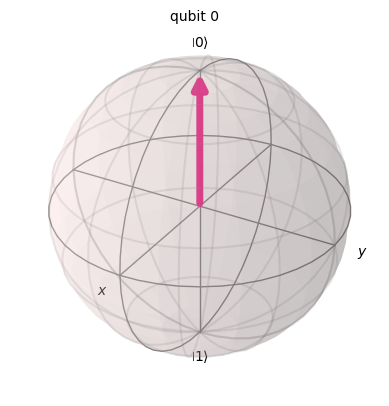

In [264]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.h(0)
#qc.rx(math.pi / 4 , 0)
#qc.rz(math.pi /2, 0)
#qc.ry(math.pi / 2, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
plot_bloch_multivector(qc)

#### Cada uma das instruções permite uma rotação em um dos eixos. Temos instruções para rotação nos eixos X, Y e Z

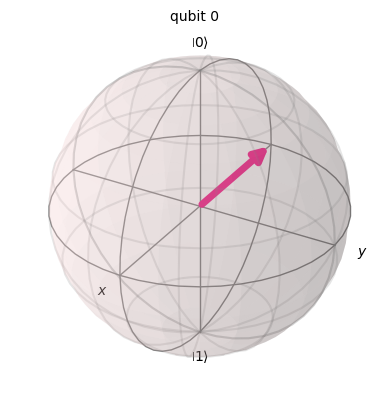

In [192]:
qc = QuantumCircuit(1,1) 
qc.rx(math.pi / 2, 0)
qc.rz(3 * math.pi/2, 0)
plot_bloch_multivector(qc)

### Um circuito em hadamard tem iguais probabilidades de gerar um resultado 0 ou resultado 1

In [260]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
circ.h(0)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'0': 543, '1': 481}


In [244]:
from qiskit import *
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)

simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

No measurements in circuit "circuit-465", classical register will remain all zeros.


{'0': 1024}


#### Quando lemos um QUBIT, ele retorna para um dos estados estáveis, que na lógica booleana é ZERO ou UM, a probabilidade é maior de ser ZERO quanto mais próximo da parte superior da esfera, e maior de ser 1 quanto mais próximo da parte inferior da esfera.

In [245]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
#qc.ry(math.pi /2, 0)
circ.h(0)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'1': 491, '0': 533}


#### Inicialmente o estado de um QUBIT é Zero, e temos instruções para invertê-lo e torná-lo UM.

In [246]:
qc = QuantumCircuit(1)   
qc.x(0)                     

simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

No classical registers in circuit "circuit-467", counts will be empty.


{}


#### O Computador quantico trabalha em cooperação com um computador tradicional. Podemos transformar um QUBIT para CBIT (Classical BIT) para fazer algum processamento adicional no computador clássico

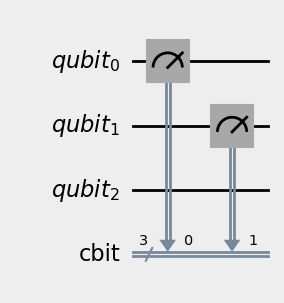

In [247]:
q = QuantumRegister(3, name="qubit")
c = ClassicalRegister(3, name="cbit")
qc = QuantumCircuit(q, c)
qc.measure([0,1], [0,1])
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

#### Como o CBIT só pode ter os valores zero e um, quando convertidos a partir de um QUBIT assumem a probabilidade mais próxima de serem ZERO ou UM.

No classical registers in circuit "circuit-469", counts will be empty.


{}


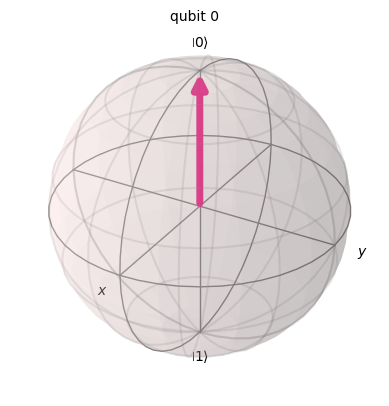

In [248]:
qc = QuantumCircuit(1)   
qc.rz(math.pi /2, 0)                        

simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print(counts)
plot_bloch_multivector(qc)

#### Um conceito importante da computação quantica é o da superposição. A superposição nos permite criar um estado especial, que tem iguais probabilidades de se tornar ZERO ou UM. Funciona como um gerador de números randômicos de um único BIT. Existe um operador especial chamado de hadamard, que transforma o QUBIT para este estado especial

No classical registers in circuit "circuit-472", counts will be empty.


{}


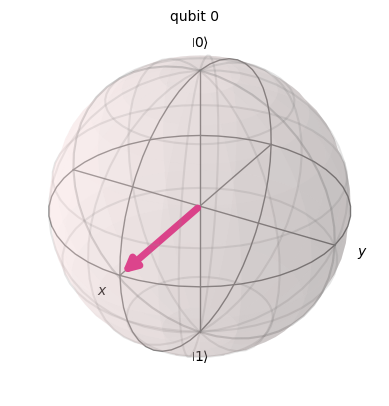

In [249]:
qc = QuantumCircuit(1)   
qc.h(0)                        

simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print(counts)
plot_bloch_multivector(qc)

#### Outro conceito importante do QUBIT é o do emaranhamento ou entrelaçamento. Podemos "conectar" dois QUBITs de forma que eles passem e ter seus valores correlacionados. Quando um QUBIT se modifica, o outro se modifica de forma complementar. Por exemplo, este circuito a seguir cria dois QUBITs conectados. Quando o valor do QUBIT 0 é igual a 1, ele inverte o valor de QUBIT 1. Se ele for Zero, o valor de QUBIT 1 não é alterado.

No classical registers in circuit "circuit-475", counts will be empty.


{}


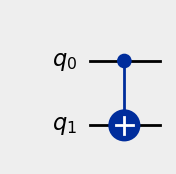

In [250]:
qc = QuantumCircuit(2)  
qc.cx(0, 1)
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

#### Para que consideremos emaranhados, os dois precisam se alterar ao mesmo tempo. O circuito anterior não está emaranhado, porque se o valor de q0 for ZERO, q1 pode ser Zero ou Um. Um exemplo de entrelaçamento pode ser 

No classical registers in circuit "circuit-476", counts will be empty.


{}


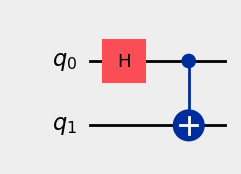

In [251]:
qc = QuantumCircuit(2) 
qc.h(0)
qc.cx(0, 1)
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

#### As portas lógicas tradicionais podem ser simuladas por operadores lógicos da computação quântica. Por exemplo, uma porta AND seguida de uma porta XOR, como a imagem da direita, pode ser criada pelo circuito abaixo

No classical registers in circuit "circuit-477", counts will be empty.


{}


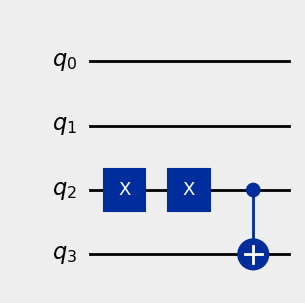

In [252]:
qc = QuantumCircuit(4) 
qc.x(2)
#qc.ccx(0,1,2)
qc.x(2)
qc.cx(2,3)
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

#### A topologia dos computadores pode variar, e a tecnologia do QISKIT permite que diversas topologias de construção de computadores quanticos sejam criados. Isto torna o software adequado para as gerações atuais e futuras de computadores quanticos

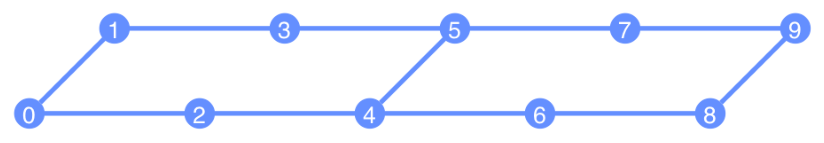

In [253]:
from qiskit.visualization import plot_coupling_map
num_qubits = 10

coupling_map = [[0,1],[1,3],[0,2],[2,4],[4,6], [6,8], [3,5], [5,7],[7,9], [4,5], [8,9]]  
# conexões entre os QUBITS
qubit_coordinates = [[0,1], [1, 2], [0, 3], [1, 4], [0,5], [1,6], [0,7], [1,8], [0,9], [1,10]]   
# camadas
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

#### Nem todas as instruções podem ser executadas por todos os computadores. Algumas vezes precisamos "decompor" instruções mais complexas em instruções mais simples, tornando a execução mais simples em um computador quantico.

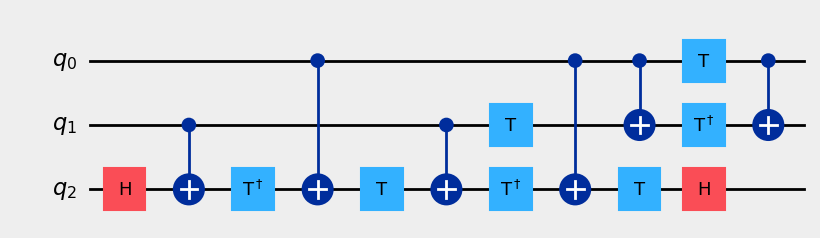

In [241]:
qc = QuantumCircuit (3)
qc.ccx (0,1,2)
qc.decompose().draw (output='mpl', style={'backgroundcolor': '#EEEEEE'}) #D - OK, BUT DECOMPOSE

#### Podemos agrupar elementos em um circuito, de forma 

2


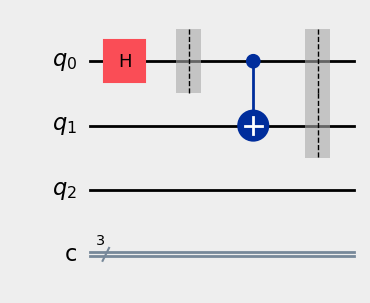

In [209]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
depth = qc.depth()
print(depth)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

#### Os códigos em QSIKIT são convertidos no ASSEMBLER verdadeiro do computador quantico, que é a linguagem QASM. 

In [220]:
from qiskit.qasm3 import *
from qiskit.qasm3 import dumps
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.x(0)

print(dumps(qc))

OPENQASM 3.0;
include "stdgates.inc";
bit[1] c;
qubit[1] q;
h q[0];
x q[0];



#### Também podemos criar circuitos a partir de um código em QASM

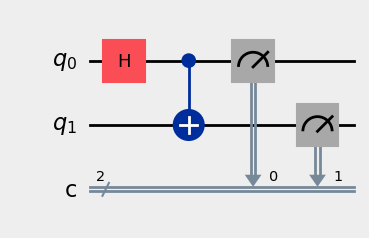

In [221]:
qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q -> c;
"""
# program = """
#     OPENQASM 3.0;
#     include "stdgates.inc";
 
#     input float[64] a;
#     qubit[3] q;
#     bit[2] mid;
#     bit[3] out;
 
#     let aliased = q[0:1];
 
#     gate my_gate(a) c, t {
#       gphase(a / 2);
#       ry(a) c;
#       cx c, t;
#     }
#     gate my_phase(a) c {
#       ctrl @ inv @ gphase(a) c;
#     }
 
#     my_gate(a * 2) aliased[0], q[{1, 2}][0];
#     measure q[0] -> mid[0];
#     measure q[1] -> mid[1];
 
#     while (mid == "00") {
#       reset q[0];
#       reset q[1];
#       my_gate(a) q[0], q[1];
#       my_phase(a - pi/2) q[1];
#       mid[0] = measure q[0];
#       mid[1] = measure q[1];
#     }
 
#     if (mid[0]) {
#       let inner_alias = q[{0, 1}];
#       reset inner_alias;
#     }
 
#     out = measure q;
# """

qc = QuantumCircuit.from_qasm_str(qasm_str)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

#### Podemos programar dinamicamente algorítmos, criando circuitos de acordo com alguma logica, tornando os códigos em QISKIT mais ricos

In [222]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
with qc.switch(creg) as case:
    with case(0):
        qc.x(0)
    with case(1):
        qc.x(1)

qasm_string = qasm3.dumps(qc, experimental=qasm3.ExperimentalFeatures.SWITCH_CASE_V1)
print(qasm_string)

OPENQASM 3.0;
include "stdgates.inc";
bit[2] c11;
int switch_dummy;
qubit[2] q6;
switch_dummy = c11;
switch (switch_dummy) {
  case 0: {
    x q6[0];
  }
  break;
  case 1: {
    x q6[1];
  }
  break;
}



#### Para que possamos fazer experiências com os QUBITs, temos que ser capazes de fazer medidas e retirar métricas. PAra isto, diversos tipos de gráficos estão disponíveis. Temos gráficos visuais que representam os QUBITs em esferas, cada um em seu gráfico separado, ou podemos representar um mapa de estados com todos os QUBITS em um gráfico apenas 

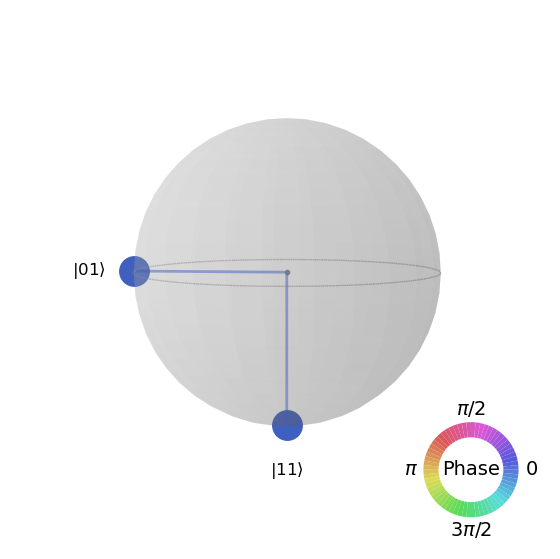

In [254]:
qc = QuantumCircuit(2)   
qc.ry(math.pi, 0)
qc.h(1)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

#### Também podemos gerar gráficos de histograma, que nos mostra a distribuição dos QUBITS para uma dada execução

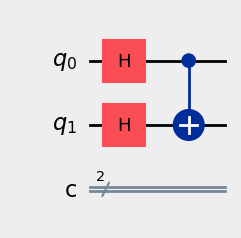

In [261]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

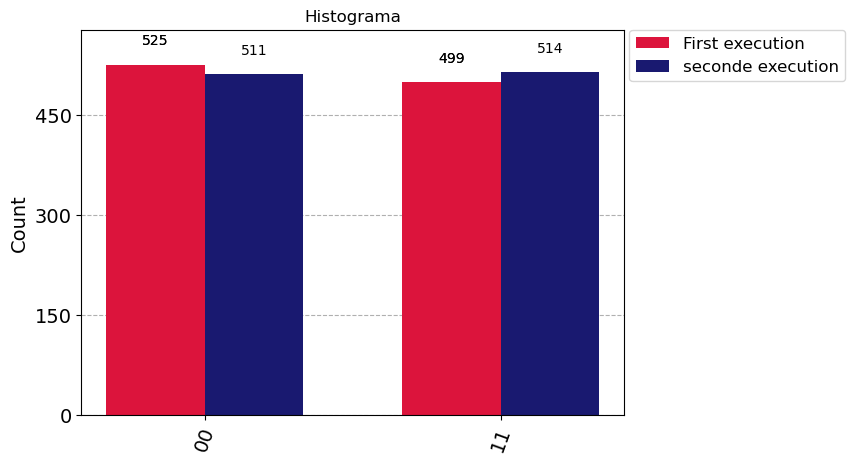

In [256]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)

circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()

counts1 = {'00': 525, '11': 499}
counts2 = {'00': 511, '11': 514}
 
legend = ['First execution', 'seconde execution']
 
#plot_histogram([counts], legend=legend, color=['crimson'],  title="Histograma")
plot_histogram([counts1, counts2], legend=legend, color=['crimson', 'midnightblue'], title="Histograma")

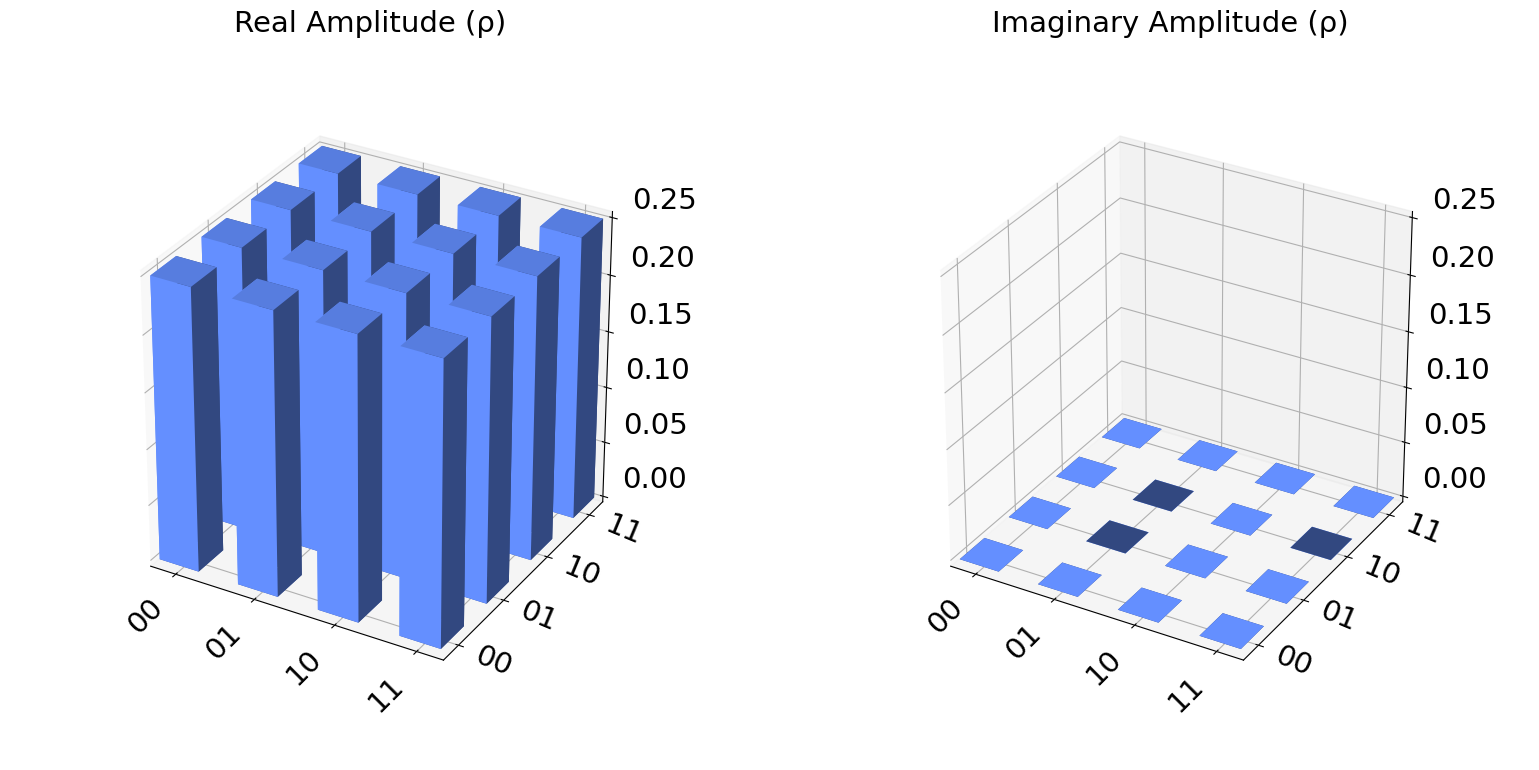

In [225]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)

qc.remove_final_measurements()  
statevector = Statevector(qc)
plot_state_city(statevector)

#### Estados também podem ser impressos e analisados

In [226]:
from qiskit import QuantumCircuit
from math import sqrt
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
qc.h(0)
# qc.h(1)
# qc.cx(1, 2)
qc.measure_all()  

qc.remove_final_measurements()  
statevector = Statevector(qc)
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


##### Common Gates
GATE | rotation | name |
--- | --- | ---- |
qc.h | X+Z (pi) | hadamard (no angle) |
qc.i,qc.id | 0 | identity (no effect) |
qc.p | Z (∅) | Phase (change Phase - rotate Z Axis) |
qc.rx | X (∅) | RX  (need angle) | 
qc.ry | Y (∅) | RY  (need angle) | 
qc.rz | Z (∅) | RZ  (need angle) | 
qc.s | Z (PI/2) | same as p(PI/2, gate) | 
qc.sdg | Z (3PI/2) | same as p(3PI/2, gate) | 
qc.sx | X (PI/2) | same as rx(PI/2, gate) | 
qc.t | Z (PI/4) | same as p(PI/4, gate) | 
qc.tdg | Z (7PI/4) | same as p(7PI/4, gate) | 
qc.u | Y,Z,Z | Apply 3 angles to QUBIT (Y,Z,Z) this order  | 
qc.x | X | same as rx(PI, gate) | 
qc.y | Y | same as ry(PI, gate) | 
qc.z | z | same as rz(PI, gate) | 
###### MultiGates
GATE | rotation | name | 
--- | --- | ---- |
qc.ccx | X | X rotate controled by 2 QUBITs (no angle) - AKA TOFFOLI | 
qc.c3sx | sx | X rotate controled by 3 QUBITs (angle) | 
qc.c4sx | x | X rotate controled by 4 QUBITs (no angle) | 
qc.ch | H | Aply hadamard accoring control gate (no angle) | 
qc.cp | Y | Apply phase (Z) with angle controlled | 
qc.crx | X | rotate X with provided angle controled | 
qc.cry | Y | rotate Y with provided angle (same as TOFFOLI) | 
qc.crzb | Z | rotate Z with provided angle | 
qc.cswap | swap | swap two controled qubits | 
qc.csx | sx | pi/2 (square root) controled | 
qc.cu  | Y,Z,Z  | U controled | 
qc.cx,qc.cnot | X | Apply x controled (inversor) | 
qc.cy | Y | Apply y controled | 
qc.cz | Z | Apply z controled | 
qc.dcx | cx | Double cnot on two qubits (q1 cntrl q2 and q2 cntrl q1) | 
qc.iswap | swap | swap two qubits change phase | 
qc.mcp | P | apply phase 3 control | 
qc.mcx | X | apply X 3 control | 
qc.swap | swap | swap two qubits | 

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
circ.h(0)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)